In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

In [5]:
nltk.download("stopwords")

stop_words = set(stopwords.words("english"))
punctuation = set(string.punctuation)

def process_text(text_series):
    words = []
    for review in text_series.dropna():
        tokens = review.lower().split()
        filtered_tokens = [
            word.strip(string.punctuation) for word in tokens
            if word not in stop_words and word.strip(string.punctuation) not in stop_words and word.strip(string.punctuation) != ''
        ]
        words.extend(filtered_tokens)
    return Counter(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nicolas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
sns.set_theme(
    style="whitegrid",
    palette="deep",
    font="sans-serif",
    rc={
        "axes.titlesize": 16,
        "axes.labelsize": 14,
        "xtick.labelsize": 9,
        "ytick.labelsize": 9,
        "legend.fontsize": 12,
        "figure.figsize": (12, 6),
        "axes.grid": True,
        "grid.linestyle": "--",
        "grid.alpha": 0.7,
    }
)

In [7]:
googleplaystore_df = pd.read_csv('db/googleplaystore.csv')
googleplaystore_reviews_df = pd.read_csv('db/googleplaystore_user_reviews.csv')

## Entendendo a Base de Dados

### googleplaystore_df

In [8]:
googleplaystore_df.shape

(10841, 13)

In [9]:
googleplaystore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
googleplaystore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [11]:
googleplaystore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [12]:
googleplaystore_df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### googleplaystore_user_reviews

In [13]:
googleplaystore_reviews_df.shape

(64295, 5)

In [14]:
googleplaystore_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [15]:
googleplaystore_reviews_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [16]:
googleplaystore_reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [17]:
googleplaystore_reviews_df.describe(include='all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,Bowmasters,Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


## Limpesa e Transformação

In [18]:
mean_rating = googleplaystore_df['Rating'].mean()
googleplaystore_df['Rating'] = googleplaystore_df['Rating'].fillna(mean_rating).infer_objects(copy=False)

googleplaystore_df = googleplaystore_df.dropna(subset=['Type', 'Content Rating', 'Android Ver'])

In [19]:
googleplaystore_df['Reviews'] = googleplaystore_df['Reviews'].astype(int)
googleplaystore_df['Installs'] = googleplaystore_df['Installs'].str.replace(",", "").str.replace("+", "").astype(int)
googleplaystore_df['Price'] = googleplaystore_df['Price'].str.replace("$", "").astype(float)

In [20]:
def size_to_mb(size):
    if "M" in size:
        return float(size.replace("M", ""))
    elif "k" in size:
        return float(size.replace("k", "")) / 1024
    else:
        return np.nan

googleplaystore_df['Size'] = googleplaystore_df['Size'].apply(size_to_mb)

In [21]:
googleplaystore_df['Last Updated'] = pd.to_datetime(googleplaystore_df['Last Updated'])

In [22]:
googleplaystore_reviews_df.dropna(subset=['Translated_Review'], how='all', inplace=True)

googleplaystore_reviews_df = googleplaystore_reviews_df.assign(
    Sentiment=googleplaystore_reviews_df["Sentiment"].fillna("Neutral"),
    Sentiment_Polarity=googleplaystore_reviews_df["Sentiment_Polarity"].fillna(0),
    Sentiment_Subjectivity=googleplaystore_reviews_df["Sentiment_Subjectivity"].fillna(0)
)

## Respondendo Perguntas - Base de dados 1: Detalhes dos Aplicativos

### Qual é a distribuição média de avaliações (rating) por categoria?

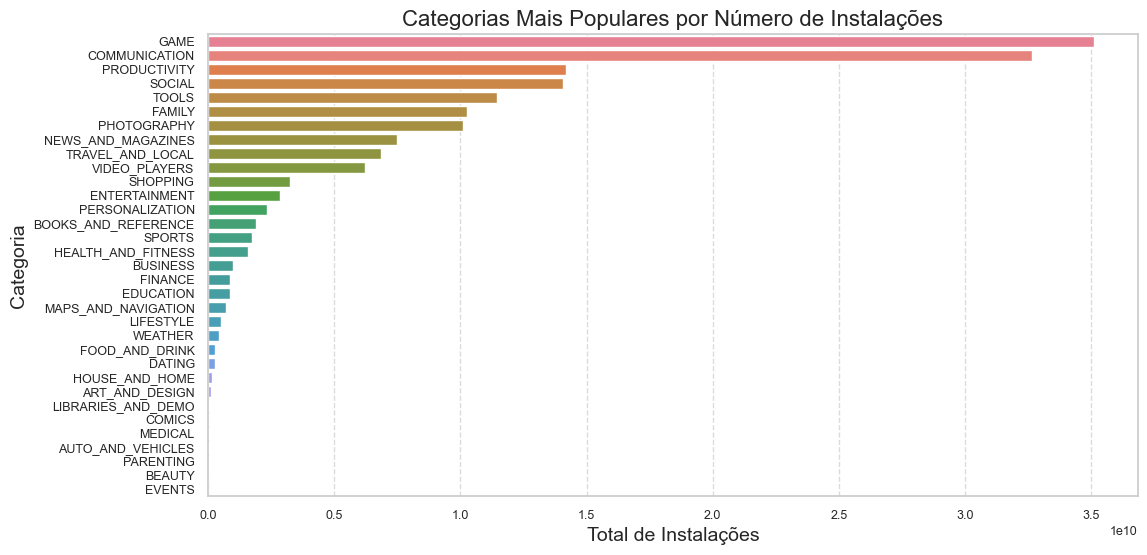

In [23]:
category_installs = googleplaystore_df.groupby("Category")['Installs'].sum().sort_values(ascending=False)

sns.barplot(x=category_installs.values, y=category_installs.index, hue=category_installs.index)
plt.title("Categorias Mais Populares por Número de Instalações")
plt.xlabel("Total de Instalações")
plt.ylabel("Categoria")
plt.show()

### Quais são os aplicativos gratuitos mais bem avaliados ?

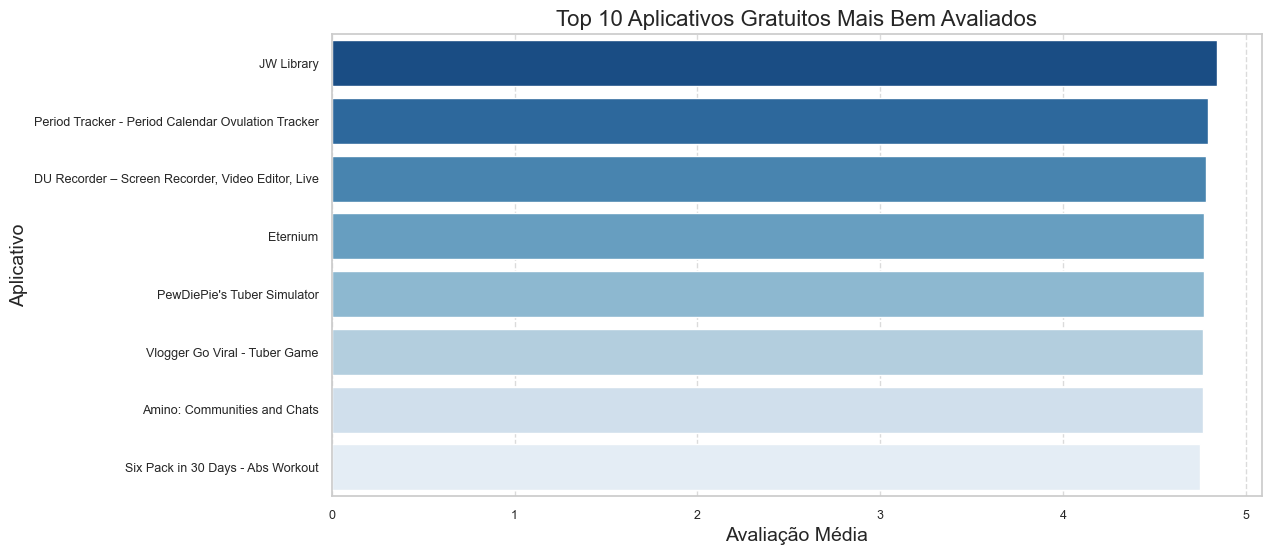

In [24]:
free_apps = googleplaystore_df[googleplaystore_df['Type'] == 'Free'].copy()

C = (free_apps["Rating"] * free_apps["Reviews"]).sum() / free_apps["Reviews"].sum()
m = np.percentile(free_apps["Reviews"], 80)

free_apps.loc[:, "ranking"] = (
    (free_apps["Reviews"] / (free_apps["Reviews"] + m)) * free_apps["Rating"] +
    (m / (free_apps["Reviews"] + m)) * C
)

best_free_apps = free_apps.sort_values(by="ranking", ascending=False)[['App', 'Category', 'Rating', 'Reviews', 'ranking']]


sns.barplot(data=best_free_apps.head(10), x='ranking', y='App', hue='App', palette='Blues_r', legend=False)
plt.title("Top 10 Aplicativos Gratuitos Mais Bem Avaliados")
plt.xlabel("Avaliação Média")
plt.ylabel("Aplicativo")
plt.show()


### Quais gêneros possuem os maiores números de instalações?

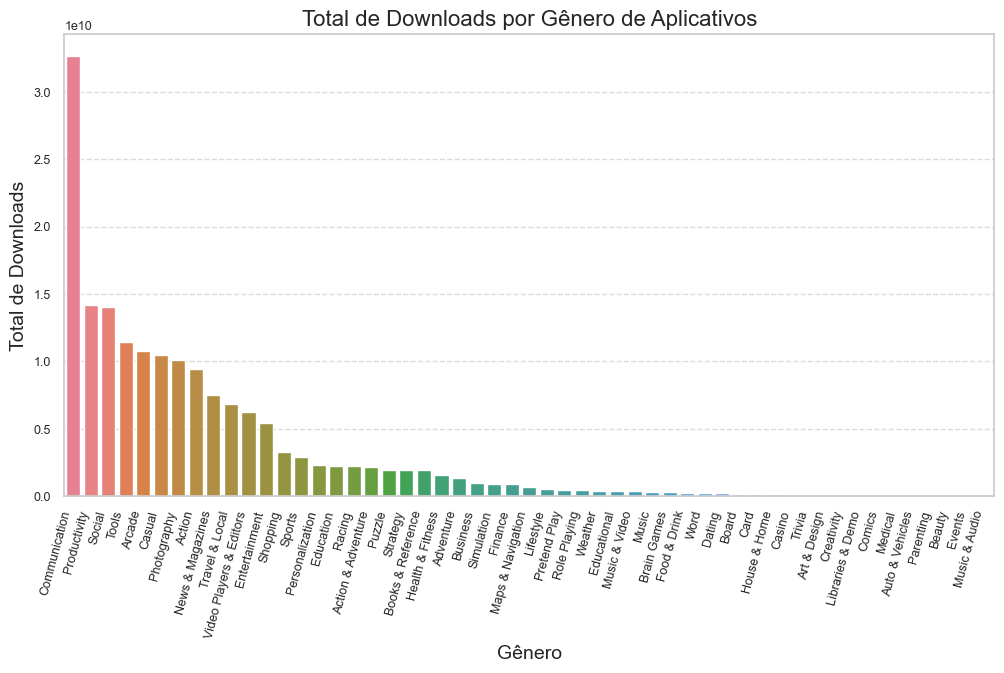

Genres
Communication       32647776251
Productivity        14176091369
Social              14069867902
Tools               11452771915
Arcade              10793339156
Casual              10465313740
Photography         10088247655
Action               9430059690
News & Magazines     7496317760
Travel & Local       6868887146
Name: Installs, dtype: int64

In [25]:
df_expanded = googleplaystore_df.assign(Genres=googleplaystore_df["Genres"].str.split(";")).explode("Genres")

genre_installs = df_expanded.groupby("Genres")["Installs"].sum().sort_values(ascending=False)

sns.barplot(x=genre_installs.index, y=genre_installs.values, hue=genre_installs.index)
plt.xticks(rotation=75, ha="right")
plt.xlabel("Gênero")
plt.ylabel("Total de Downloads")
plt.title("Total de Downloads por Gênero de Aplicativos")
plt.show()

genre_installs.head(10)


### Qual é a distribuição de avaliações por faixa etária (Content Rating)?

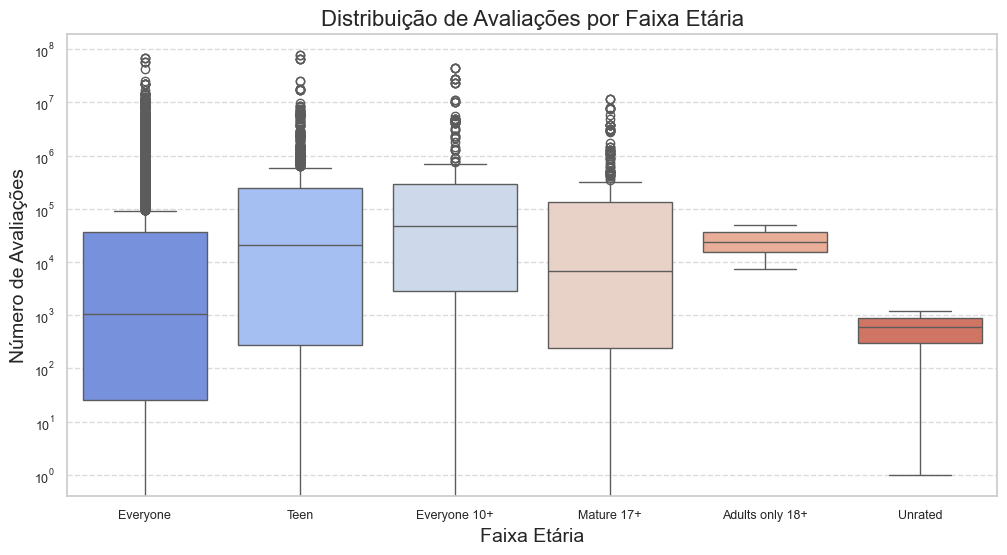

In [26]:
sns.boxplot(data=googleplaystore_df, x='Content Rating', y='Reviews', hue='Content Rating', palette='coolwarm', legend=False)
plt.title("Distribuição de Avaliações por Faixa Etária")
plt.xlabel("Faixa Etária")
plt.ylabel("Número de Avaliações")
plt.yscale("log")
plt.show()

### Quais são os aplicativos pagos mais caros e suas categorias?

In [27]:
most_expensive_apps = googleplaystore_df[googleplaystore_df['Type'] == 'Paid'].sort_values(by='Price', ascending=False)
print("Top aplicativos pagos mais caros e suas categorias:")
most_expensive_apps[['App', 'Category', 'Price']].head(10)

Top aplicativos pagos mais caros e suas categorias:


,App,Category,Price
4367,I'm Rich - Trump Edition,LIFESTYLE,400.00
5354,I am Rich Plus,FAMILY,399.99
5351,I am rich,LIFESTYLE,399.99
5359,I am rich(premium),FINANCE,399.99
5358,I am Rich!,FINANCE,399.99
5364,I am rich (Most expensive app),FINANCE,399.99
5356,I Am Rich Premium,FINANCE,399.99
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,399.99
5369,I am Rich,FINANCE,399.99
5373,I AM RICH PRO PLUS,FINANCE,399.99


### Qual é a relação entre o número de avaliações e o rating por categoria ?

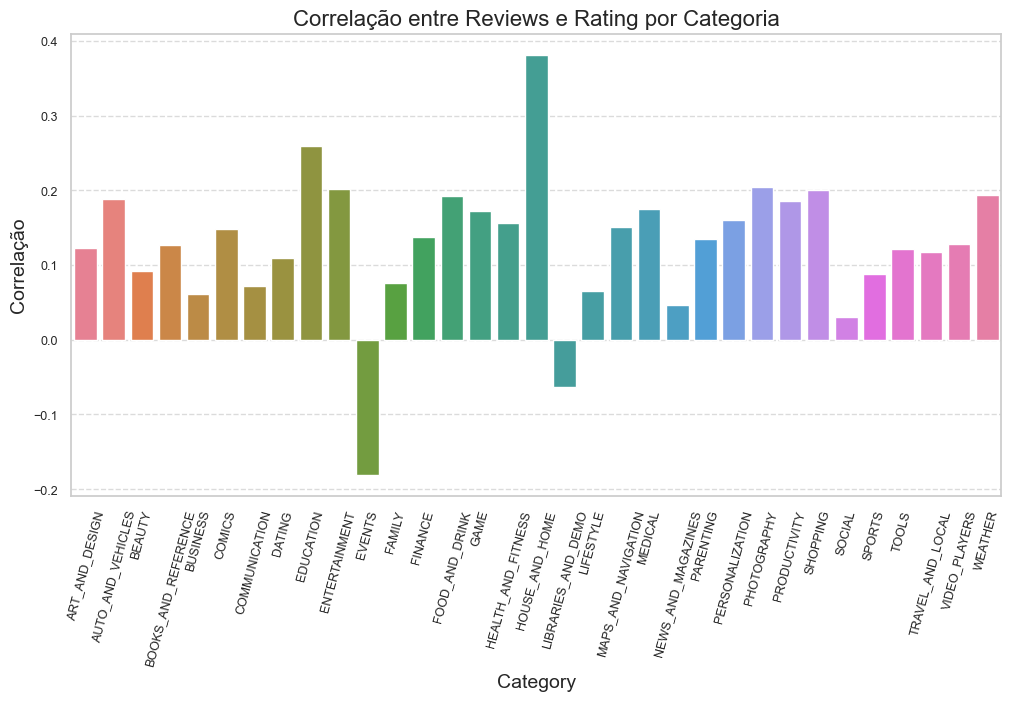

In [28]:
category_correlation = googleplaystore_df.groupby('Category').apply(lambda x: x['Reviews'].corr(x['Rating']), include_groups=False)

sns.barplot(x=category_correlation.index, y=category_correlation.values, hue=category_correlation.index)
plt.title('Correlação entre Reviews e Rating por Categoria')
plt.xticks(rotation=75)
plt.ylabel('Correlação')
plt.show()

### Quais são as versões mínimas do Android mais exigidas pelos aplicativos mais populares?

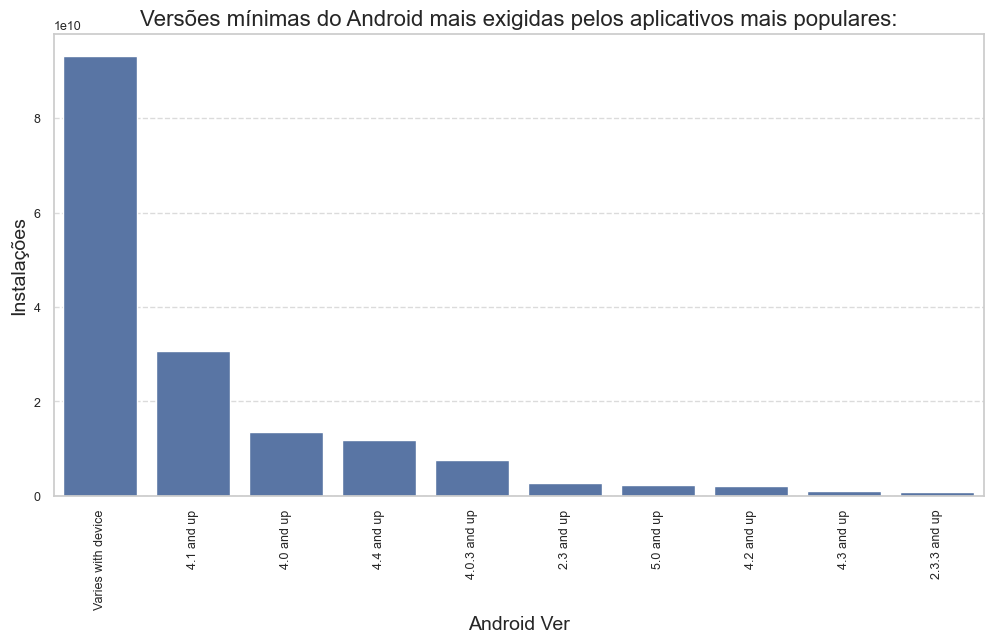

In [29]:
android_versions = googleplaystore_df.groupby("Android Ver")['Installs'].sum().sort_values(ascending=False)

sns.barplot(x=android_versions.head(10).index, y=android_versions.head(10).values)
plt.title('Versões mínimas do Android mais exigidas pelos aplicativos mais populares:')
plt.xticks(rotation=90)
plt.ylabel('Instalações')
plt.show()

## Respondendo Perguntas - Base de dados 2: Análise de Sentimento

### 1. Qual é a distribuição de sentimentos (positivo, neutro, negativo) por aplicativo?

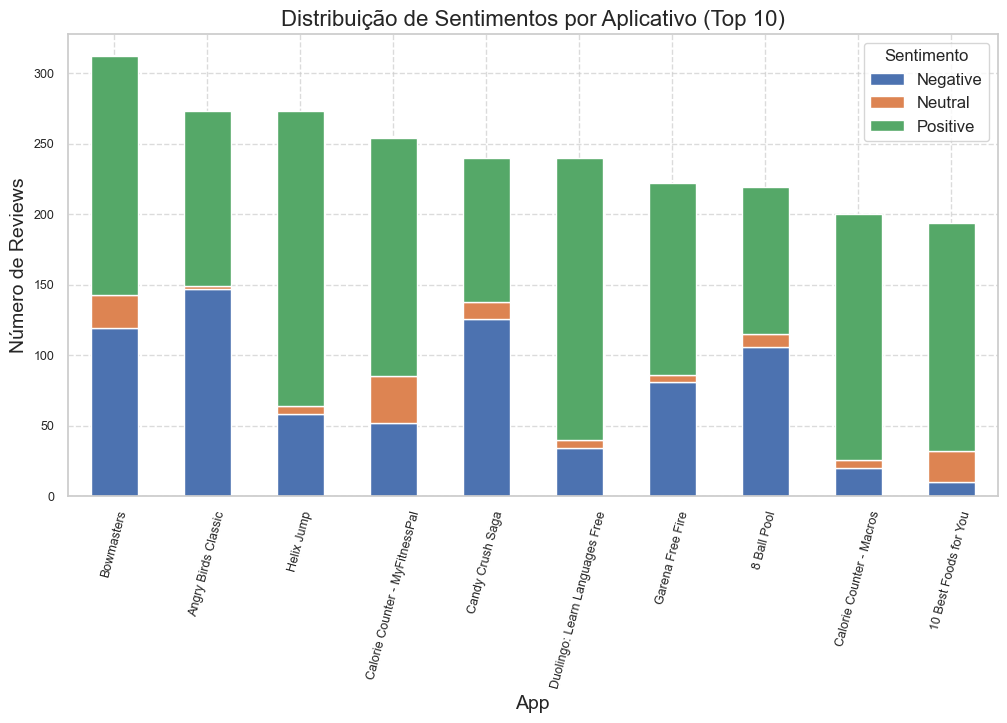

In [30]:
sentiment_counts = googleplaystore_reviews_df.groupby(["App", "Sentiment"]).size().unstack(fill_value=0)

top_apps = sentiment_counts.sum(axis=1).nlargest(10).index

sentiment_counts.loc[top_apps].plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Distribuição de Sentimentos por Aplicativo (Top 10)")
plt.ylabel("Número de Reviews")
plt.xticks(rotation=75)
plt.legend(title="Sentimento")
plt.show()


### 2. Aplicativos com maior proporção de reviews positivas entre os mais baixados

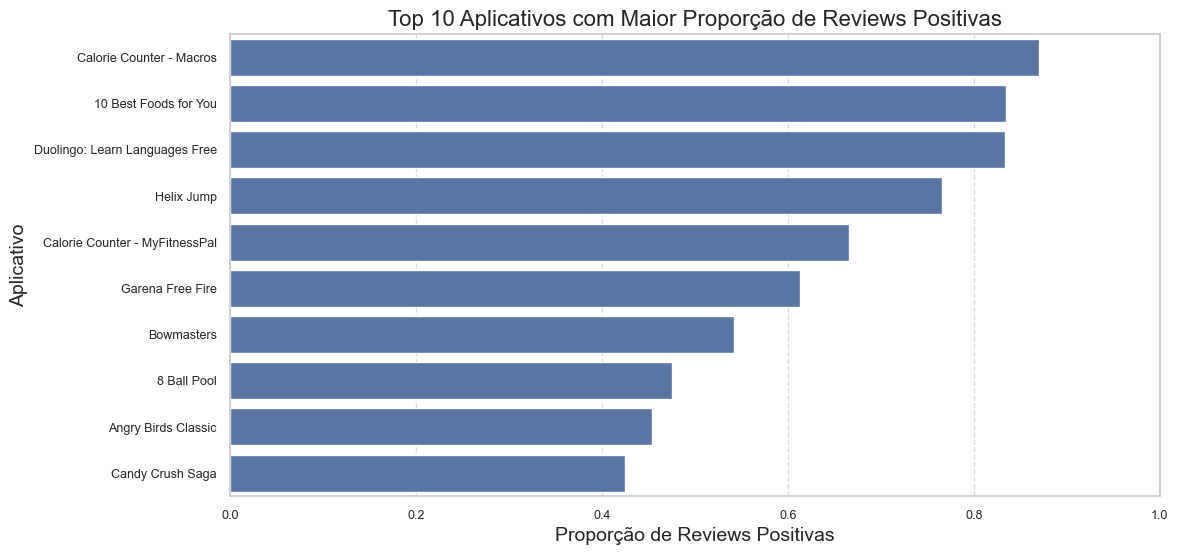

In [31]:
sentiment_counts["Positive_Rate"] = sentiment_counts["Positive"] / sentiment_counts.sum(axis=1)
top_positive_apps = sentiment_counts.loc[top_apps]["Positive_Rate"].nlargest(10)

sns.barplot(x=top_positive_apps.values, y=top_positive_apps.index)
plt.title("Top 10 Aplicativos com Maior Proporção de Reviews Positivas")
plt.xlabel("Proporção de Reviews Positivas")
plt.ylabel("Aplicativo")
plt.xlim(0, 1)
plt.show()

### 3. Palavras mais frequentes em reviews negativas e positivas

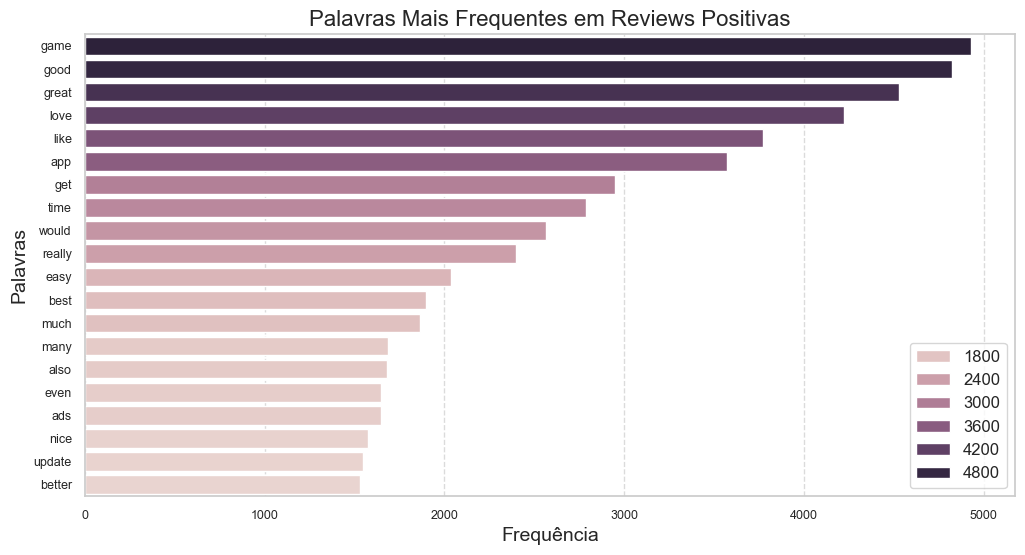

In [32]:
positive_reviews = googleplaystore_reviews_df[googleplaystore_reviews_df["Sentiment"] == "Positive"]["Translated_Review"]
positive_word_counts = process_text(positive_reviews)
most_common_positive = positive_word_counts.most_common(20)
most_common_positive_words_number_array = [word[1] for word in most_common_positive]

sns.barplot(x=most_common_positive_words_number_array, y=[word[0] for word in most_common_positive], hue=most_common_positive_words_number_array)
plt.title("Palavras Mais Frequentes em Reviews Positivas")
plt.xlabel("Frequência")
plt.ylabel("Palavras")
plt.show()

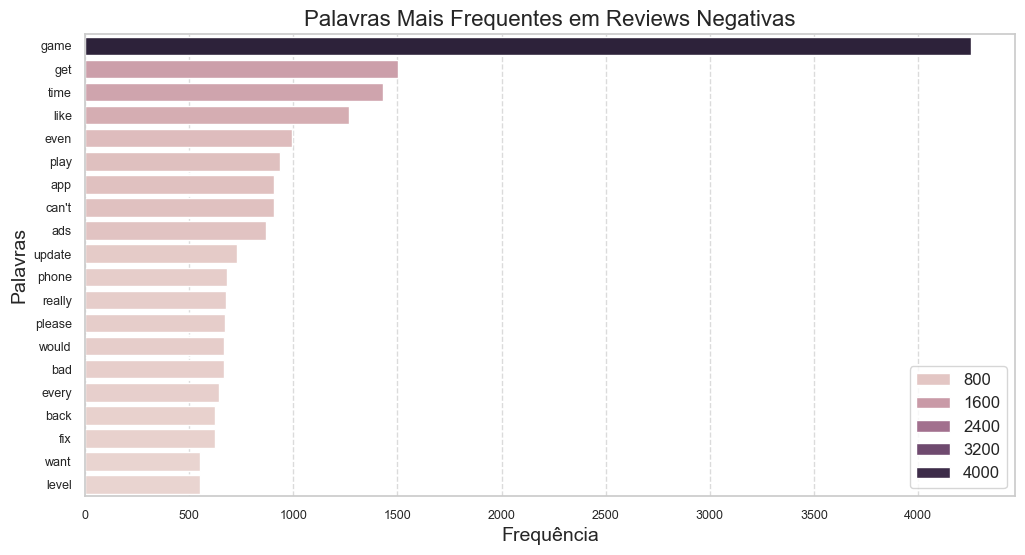

In [33]:
negative_reviews = googleplaystore_reviews_df[googleplaystore_reviews_df["Sentiment"] == "Negative"]

negative_word_counts = process_text(negative_reviews["Translated_Review"])
most_common_negative = negative_word_counts.most_common(20)
most_common_negative_words_number_array = [word[1] for word in most_common_negative]

sns.barplot(x=most_common_negative_words_number_array, y=[word[0] for word in most_common_negative], hue=most_common_negative_words_number_array)
plt.title("Palavras Mais Frequentes em Reviews Negativas")
plt.xlabel("Frequência")
plt.ylabel("Palavras")
plt.show()

### 4. Variação da subjetividade média entre aplicativos

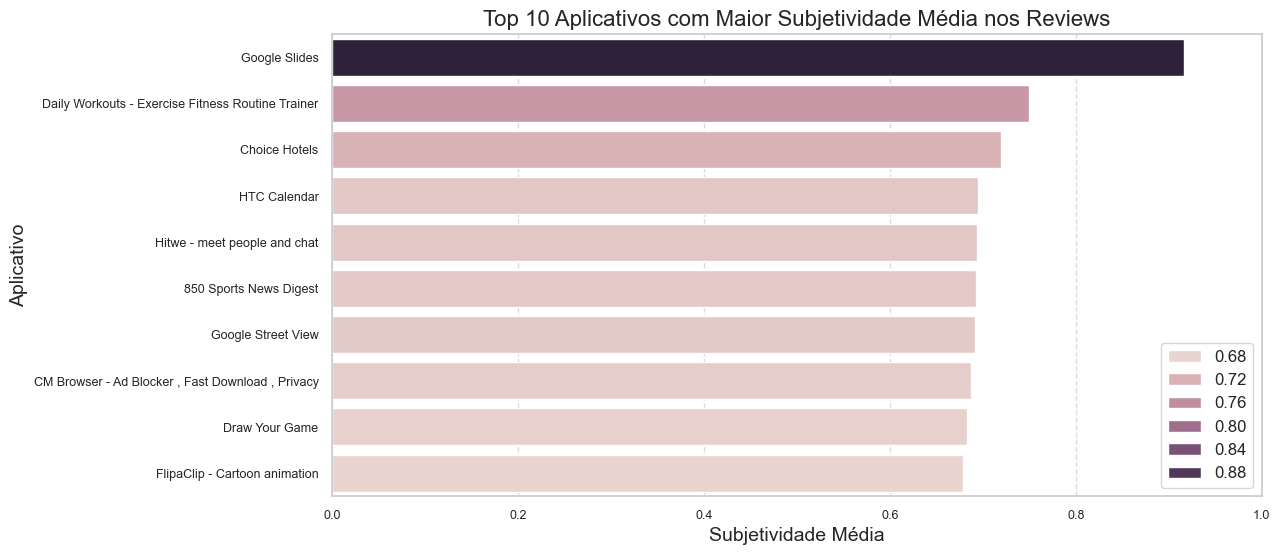

In [34]:
app_subjectivity = googleplaystore_reviews_df.groupby("App")["Sentiment_Subjectivity"].mean().nlargest(10)

sns.barplot(x=app_subjectivity.values, y=app_subjectivity.index, hue=app_subjectivity.values)
plt.title("Top 10 Aplicativos com Maior Subjetividade Média nos Reviews")
plt.xlabel("Subjetividade Média")
plt.ylabel("Aplicativo")
plt.xlim(0, 1)
plt.show()


### 5. Distribuição de Sentimentos nos Aplicativos com Maiores Ratings

Sentiment
Positive    70.031286
Negative    20.788737
Neutral      9.179977
Name: proportion, dtype: float64


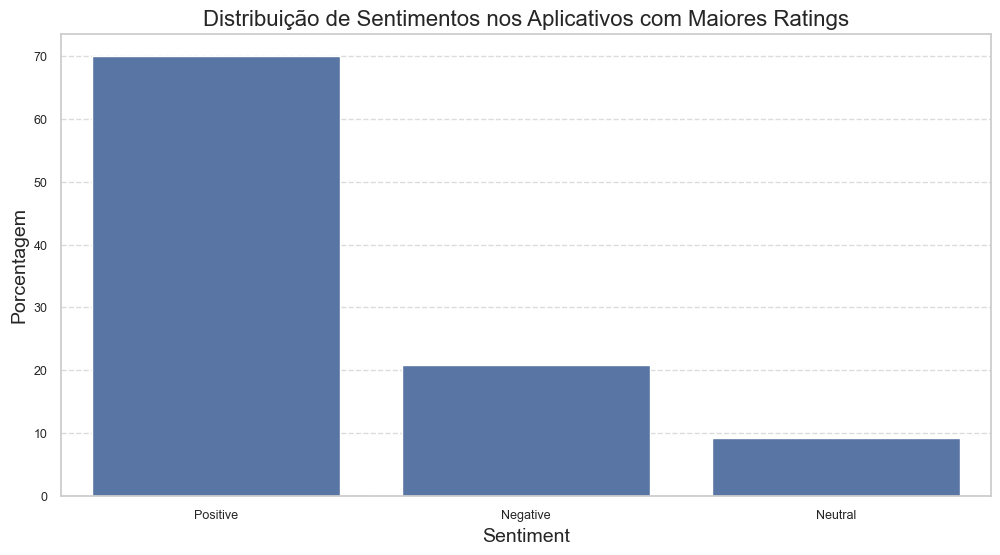

In [35]:
top_rated_apps = googleplaystore_df[googleplaystore_df['Rating'] >= 4.5]['App']

top_rated_reviews = googleplaystore_reviews_df[googleplaystore_reviews_df['App'].isin(top_rated_apps)]

sentiment_counts = top_rated_reviews['Sentiment'].value_counts(normalize=True) * 100
print(sentiment_counts)

sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribuição de Sentimentos nos Aplicativos com Maiores Ratings')
plt.ylabel('Porcentagem')
plt.show()

### Apps com maior polaridade positiva e negativa

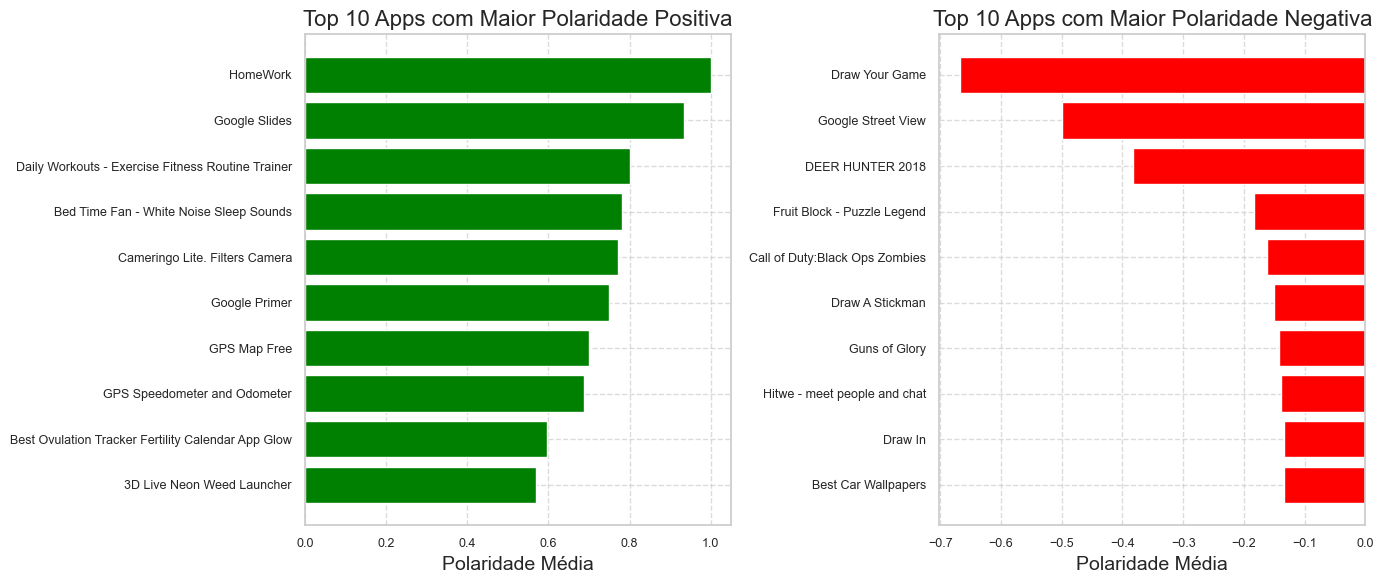

In [36]:
apps_polarity = googleplaystore_reviews_df.groupby("App")["Sentiment_Polarity"].mean()

top_positive = apps_polarity.nlargest(10)
top_negative = apps_polarity.nsmallest(10)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].barh(top_positive.index, top_positive.values, color='green')
ax[0].set_title("Top 10 Apps com Maior Polaridade Positiva")
ax[0].set_xlabel("Polaridade Média")
ax[0].invert_yaxis()

ax[1].barh(top_negative.index, top_negative.values, color='red')
ax[1].set_title("Top 10 Apps com Maior Polaridade Negativa")
ax[1].set_xlabel("Polaridade Média")
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()

## Respondendo Perguntas - Ambas as Bases de Dados

### 1. Os aplicativos mais populares (por número de instalações) possuem reviews predominantemente positivos?

### 2. Quais aplicativos gratuitos possuem maior polaridade positiva nos reviews?

### 3. Existe alguma relação entre o tamanho do aplicativo e os sentimentos dos reviews?

### 4. Quais categorias possuem maior número de reviews subjetivas?

### 5. Os aplicativos pagos têm sentimentos mais positivos do que os gratuitos?